In [21]:
# Dependencies 
import pandas as pd 

In [22]:
# Create reference to CSV file
schools_path = "Resources/schools_complete.csv"
students_path = "Resources/students_complete.csv"

# Import the CSV into a pandas DataFrame
schools_df = pd.read_csv(schools_path)
students_df = pd.read_csv(students_path)
merge_df = pd.merge( schools_df, students_df,on = "school_name", how = "left")

In [23]:
#Display merge_df 
merge_df.head()

,School ID,school_name,type,size,budget,Student ID,student_name,gender,grade,reading_score,math_score
0,0,Huang High School,District,2917,1910635,0,Paul Bradley,M,9th,66,79
1,0,Huang High School,District,2917,1910635,1,Victor Smith,M,12th,94,61
2,0,Huang High School,District,2917,1910635,2,Kevin Rodriguez,M,12th,90,60
3,0,Huang High School,District,2917,1910635,3,Dr. Richard Scott,M,12th,67,58
4,0,Huang High School,District,2917,1910635,4,Bonnie Ray,F,9th,97,84


In [24]:
#Part 1:  District Summary 
# Find the total school counts, students count, and budget  
total_school = schools_df['school_name'].count()
total_students = schools_df['size'].sum()
total_budget = schools_df['budget'].sum()

# Calculate average math score and average reading score
average_math_score = merge_df.math_score.mean()
average_reading_score = merge_df.reading_score.mean()

# Calculate percentage of passing math only, pass reading only , and passing both subjects (overall passing)
pass_math_df = merge_df.loc[merge_df['math_score'] >= 70]
pass_math_percent = 100*len(pass_math_df)/len(merge_df)

pass_reading_df = merge_df.loc[merge_df['reading_score'] >= 70]
pass_reading_percent = 100* len(pass_reading_df)/len(merge_df)

pass_overall_df = merge_df.loc[(merge_df['math_score'] >= 70) & (merge_df['reading_score'] >= 70) ]
pass_overall_percent = 100*len(pass_overall_df)/len(merge_df)


In [25]:
# Display District Summary 
summary_df = pd.DataFrame({ "Total School" : [total_school], 
                         "Total Students" :[total_students], 
                         "Total Budget": [total_budget],
                           "Average Math Score" : [average_math_score], 
                           "Average Reading Score " : [average_reading_score], 
                           "% Passing Math" : [pass_math_percent], 
                           "% Passing Reading" : [pass_reading_percent], 
                           "% Overall Passing" : [pass_overall_percent]
                          })

# Formatting the Dictrict Summary report 
summary_df["Total Budget"] = summary_df["Total Budget"].map("${:,.2f}".format)
summary_df["Total Students"] = summary_df["Total Students"].map("{:,}".format)
summary_df


,Total School,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,"39,170","$24,649,428.00",78.985371,81.87784,74.980853,85.805463,65.172326


In [26]:
# Part 2: School Summary 

# Find the size, budget, and per student budget, and school type for the school 
grouped_schools = merge_df.set_index('school_name').groupby(['school_name'])
school_type = schools_df.set_index('school_name')['type']
students_count = merge_df['school_name'].value_counts()
school_budget = grouped_schools['budget'].mean()
per_student_budget = school_budget/students_count

# Calculate the average math and average reading score 
average_math_score = grouped_schools['math_score'].mean()
average_reading_score = grouped_schools['reading_score'].mean()

# Calculate percentage of passing math only, pass reading only , and passing both subjects
grouped_pass_math = pass_math_df.groupby('school_name').count()
grouped_pass_reading = pass_reading_df.groupby ('school_name').count()
grouped_pass_overall = pass_overall_df.groupby('school_name').count()

percent_grouped_pass_math = 100* grouped_pass_math['math_score']/students_count
percent_grouped_pass_reading = 100* grouped_pass_reading['reading_score']/students_count
percent_grouped_overall = 100* grouped_pass_overall['math_score']/students_count

#School Summary display 
school_summary = pd.DataFrame({ "School Type" :school_type, 
                         "Total Students" : students_count, 
                         "Total Budget": school_budget,
                               "Per Student Budget": per_student_budget,
                           "Average Math Score" : average_math_score, 
                           "Average Reading Score" : average_reading_score, 
                           "% Passing Math" : percent_grouped_pass_math, 
                           "% Passing Reading" : percent_grouped_pass_reading, 
                           "% Overall Passing" : percent_grouped_overall
                          })

#School Summary formatting 
school_summary["Total Budget"] = school_summary["Total Budget"].map("${:,.2f}".format)
school_summary

,School Type,Total Students,Total Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Bailey High School,District,4976,"$3,124,928.00",628.0,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,"$1,081,356.00",582.0,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,"$1,884,411.00",639.0,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,"$1,763,916.00",644.0,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,"$917,500.00",625.0,83.351499,83.816757,93.392371,97.138965,90.599455
Hernandez High School,District,4635,"$3,022,020.00",652.0,77.289752,80.934412,66.752967,80.862999,53.527508
Holden High School,Charter,427,"$248,087.00",581.0,83.803279,83.814988,92.505855,96.252927,89.227166
Huang High School,District,2917,"$1,910,635.00",655.0,76.629414,81.182722,65.683922,81.316421,53.513884
Johnson High School,District,4761,"$3,094,650.00",650.0,77.072464,80.966394,66.057551,81.222432,53.539172
Pena High School,Charter,962,"$585,858.00",609.0,83.839917,84.044699,94.594595,95.945946,90.540541


In [27]:

# Part 3: Find the top 5th highest performing 
highest_performing_school = school_summary.sort_values("% Overall Passing", ascending=False)
highest_performing_school.head(5)

,School Type,Total Students,Total Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Cabrera High School,Charter,1858,"$1,081,356.00",582.0,83.061895,83.975780,94.133477,97.039828,91.334769
Thomas High School,Charter,1635,"$1,043,130.00",638.0,83.418349,83.848930,93.272171,97.308869,90.948012
Griffin High School,Charter,1468,"$917,500.00",625.0,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,Charter,2283,"$1,319,574.00",578.0,83.274201,83.989488,93.867718,96.539641,90.582567
Pena High School,Charter,962,"$585,858.00",609.0,83.839917,84.044699,94.594595,95.945946,90.540541


In [28]:
#Part4: Find the top 5 lowest performing school 
lowest_performing_school = school_summary.sort_values("% Overall Passing", ascending=True)
lowest_performing_school.head(5)

,School Type,Total Students,Total Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Rodriguez High School,District,3999,"$2,547,363.00",637.0,76.842711,80.744686,66.366592,80.220055,52.988247
Figueroa High School,District,2949,"$1,884,411.00",639.0,76.711767,81.158020,65.988471,80.739234,53.204476
Huang High School,District,2917,"$1,910,635.00",655.0,76.629414,81.182722,65.683922,81.316421,53.513884
Hernandez High School,District,4635,"$3,022,020.00",652.0,77.289752,80.934412,66.752967,80.862999,53.527508
Johnson High School,District,4761,"$3,094,650.00",650.0,77.072464,80.966394,66.057551,81.222432,53.539172


In [29]:
# Part 5: Math Scores by Grade 
# 9th grade data 
nine_grade = merge_df.loc[merge_df['grade'] == "9th"]
grouped_nine_grade = nine_grade.groupby("school_name").mean()

# 10th grade data 
ten_grade = merge_df.loc[merge_df['grade'] == "10th"]
grouped_tenth_grade = ten_grade.groupby("school_name").mean()

# 11th grade data 
eleven_grade = merge_df.loc[merge_df['grade'] == "11th"]
grouped_eleventh_grade = eleven_grade.groupby("school_name").mean()

# 12th grade data 
twelve_grade = merge_df.loc[merge_df['grade'] == "12th"]
grouped_twelveth_grade = twelve_grade.groupby("school_name").mean()

#Display the Math Score by Grade Levels 
Average_Math_summary = pd.DataFrame ({"9th":  grouped_nine_grade['math_score'],
                                     "10th":  grouped_tenth_grade['math_score'],
                                     "11th":  grouped_eleventh_grade['math_score'],
                                      "12th" : grouped_twelveth_grade['math_score']
                                     })
Average_Math_summary

,9th,10th,11th,12th
school_name,,,,
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248


In [30]:
# Part 6: Find average reading score for each grade level (9-12)
Average_Reading_summary = pd.DataFrame ({"9th":  grouped_nine_grade['reading_score'],
                                     "10th":  grouped_tenth_grade['reading_score'],
                                     "11th":  grouped_eleventh_grade['reading_score'],
                                      "12th" : grouped_twelveth_grade['reading_score']
                                     })
Average_Reading_summary

,9th,10th,11th,12th
school_name,,,,
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564


In [31]:
# Part 7: Scores by school pending 
# Group schools by their spending using bins. 
bins = [0, 585,630 , 645 , 680]
bins_label = [ "< $585", "$585-630", "$630-645", "$645-680"]
spending_df = school_summary
spending_df["Spending Ranges (Per Student)"] = pd.cut(spending_df["Per Student Budget"], bins, 
                                                         labels = bins_label, include_lowest=True) 
spending_df = spending_df.groupby("Spending Ranges (Per Student)").mean()

del spending_df["Per Student Budget"]
del spending_df["Total Students"]
#formatting
spending_df['Average Math Score'] = spending_df['Average Math Score'].map("{:.2f}".format)
spending_df['Average Reading Score'] = spending_df['Average Reading Score'].map("{:.2f}".format)
spending_df['% Overall Passing'] = spending_df['% Overall Passing'].map("{:.2f}".format)
spending_df['% Passing Math'] = spending_df['% Passing Math'].map("{:.2f}".format)
spending_df['% Passing Reading'] = spending_df['% Passing Reading'].map("{:.2f}".format)
spending_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
< $585,83.46,83.93,93.46,96.61,90.37
$585-630,81.90,83.16,87.13,92.72,81.42
$630-645,78.52,81.62,73.48,84.39,62.86
$645-680,77.00,81.03,66.16,81.13,53.53


In [32]:
# Part 8: Scores by School size 
# Group schools by the school sizes using bins. 
size_bins = [0, 1000 , 2000 , 5000]
size_label = [ "Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]
size_df = school_summary
size_df["School Size"] = pd.cut(size_df["Total Students"], size_bins, 
                                                         labels = size_label, include_lowest=True) 
size_df = size_df.groupby("School Size").mean()
del size_df["Total Students"]
del size_df["Per Student Budget"]
size_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
Small (<1000),83.821598,83.929843,93.550225,96.099437,89.883853
Medium (1000-2000),83.374684,83.864438,93.599695,96.790680,90.621535
Large (2000-5000),77.746417,81.344493,69.963361,82.766634,58.286003


In [33]:
# Part 9: Scores by school types 
# Group schools by their school types using the school summary 
type_df = school_summary.groupby("School Type").mean()
del type_df['Total Students']
del type_df['Per Student Budget']
type_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Type,,,,,
Charter,83.473852,83.896421,93.620830,96.586489,90.432244
District,76.956733,80.966636,66.548453,80.799062,53.672208



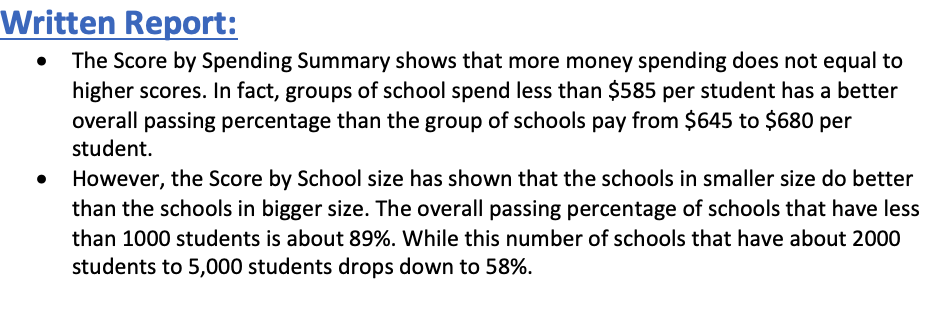
